In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 200 GB / percent used: 20.5 %


# Check model data

In [3]:
var = 'ta'
folder = 'ATM'
exp = 'clim-without-MVA9'

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Define variable
label, units, cmap, levels = u.get_var_infos(var)

# Define paths
title_1 = 'clim-def'
root_1 = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim'
path_1 = root_1+'/clim-relief-def-NMC/'+folder+'/Analyse/TS_MO'

title_2 = 'clim-without-MVA9'
root_2 = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR_v6.1.11_without_elevation_average/PROD/clim'
path_2 = root_2+'/clim-relief-def/'+folder+'/Analyse/TS_MO'

In [4]:
path_1

'/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-def-NMC/ATM/Analyse/TS_MO'

## Define period

In [5]:
xr.open_mfdataset(path_1+'/*'+var+'.nc', combine='by_coords').time_counter.coords

Coordinates:
    time_centered  (time_counter) object dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1989-12-16 00:00:00

In [6]:
xr.open_mfdataset(path_2+'/*'+var+'.nc', combine='by_coords').time_counter.coords

Coordinates:
    time_centered  (time_counter) object dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1989-12-16 00:00:00

In [7]:
# Here the time doesn't make so much sense because the simulation are clim
period = slice('1980','1989')

## Load climatologies

In [8]:
model_1_clim = xr.open_mfdataset(path_1+'/*'+var+'.nc', combine='by_coords'
                                )[var].mean('time_counter', skipna=False) - 273.15
model_1_clim.load()

<xarray.DataArray 'ta' (plev: 17, lat: 143, lon: 144)>
array([[[-15.157776 , -15.157776 , -15.157776 , ..., -15.157776 ,
         -15.157776 , -15.157776 ],
        [-15.281311 , -15.293335 , -15.295685 , ..., -15.2659   ,
         -15.267792 , -15.278534 ],
        [-15.1922   , -15.211426 , -15.228851 , ..., -15.1586   ,
         -15.167206 , -15.183472 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-12.509491 , -12.509491 , -12.509491 , ..., -12.509491 ,
         -12.509491 , -12.509491 ],
        [-12.695496 , -12.703857 , -12.7109375, ..., -12.686554 ,
         -12.692657 , -12.692902 ],
        [-12.753723 , -12.760529 , -12.768829 , ..., -12.732483 ,
         -12.737122 , -12.749634 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-13.451447 , -13.451447 , -13.451447 , ..., -13.451447 ,
         -13.451447 , -13.451447 ],
        [-13.571472 , -13.571716 , -13.575287 , ..., -13.563324 ,
         -13.564392 , -13.57019  ],
        [-13.576111 , -13.584564 , -13.586884 , ..., -13.561554 ,
         -13.567841 , -13.571533 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       ...,

       [[-52.396866 , -52.396866 , -52.396866 , ..., -52.396866 ,
         -52.396866 , -52.396866 ],
        [-52.320206 , -52.319    , -52.318344 , ..., -52.327545 ,
         -52.324585 , -52.322052 ],
        [-52.011627 , -52.00981  , -52.00914  , ..., -52.024353 ,
         -52.018936 , -52.01471  ],
        ...,
        [-62.936996 , -62.94423  , -62.951645 , ..., -62.919678 ,
         -62.92488  , -62.930435 ],
        [-63.152634 , -63.156204 , -63.160156 , ..., -63.143494 ,
         -63.146378 , -63.1494   ],
        [-63.286743 , -63.286743 , -63.286743 , ..., -63.286743 ,
         -63.286743 , -63.286743 ]],

       [[-50.859512 , -50.859512 , -50.859512 , ..., -50.859512 ,
         -50.859512 , -50.859512 ],
        [-50.813797 , -50.81462  , -50.815964 , ..., -50.814606 ,
         -50.81378  , -50.81349  ],
        [-50.52542  , -50.52777  , -50.531265 , ..., -50.524933 ,
         -50.523987 , -50.52411  ],
        ...,
        [-58.99324  , -59.002106 , -59.011063 , ..., -58.97     ,
         -58.97728  , -58.984802 ],
        [-59.169662 , -59.174057 , -59.17871  , ..., -59.157455 ,
         -59.161285 , -59.16536  ],
        [-59.271423 , -59.271423 , -59.271423 , ..., -59.271423 ,
         -59.271423 , -59.271423 ]],

       [[-44.891006 , -44.891006 , -44.891006 , ..., -44.891006 ,
         -44.891006 , -44.891006 ],
        [-44.864822 , -44.869324 , -44.874283 , ..., -44.853058 ,
         -44.856735 , -44.86055  ],
        [-44.688705 , -44.698227 , -44.708344 , ..., -44.66394  ,
         -44.671494 , -44.679794 ],
        ...,
        [-48.906982 , -48.91725  , -48.92708  , ..., -48.878265 ,
         -48.88817  , -48.897217 ],
        [-48.97928  , -48.98474  , -48.990097 , ..., -48.963547 ,
         -48.969086 , -48.974228 ],
        [-49.007507 , -49.007507 , -49.007507 , ..., -49.007507 ,
         -49.007507 , -49.007507 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172

In [9]:
model_2_clim = xr.open_mfdataset(path_2+'/*'+var+'.nc', combine='by_coords'
                                )[var].mean('time_counter', skipna=False) - 273.15
model_2_clim.load()

<xarray.DataArray 'ta' (plev: 17, lat: 143, lon: 144)>
array([[[-14.347656 , -14.347656 , -14.347656 , ..., -14.347656 ,
         -14.347656 , -14.347656 ],
        [-14.556274 , -14.565857 , -14.580383 , ..., -14.531128 ,
         -14.538971 , -14.548553 ],
        [-14.466583 , -14.4921875, -14.509644 , ..., -14.415649 ,
         -14.4279785, -14.450073 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-11.7769165, -11.7769165, -11.7769165, ..., -11.7769165,
         -11.7769165, -11.7769165],
        [-11.909424 , -11.916138 , -11.919434 , ..., -11.906433 ,
         -11.906128 , -11.910217 ],
        [-11.961212 , -11.960602 , -11.964874 , ..., -11.951935 ,
         -11.95343  , -11.95871  ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-12.834442 , -12.834442 , -12.834442 , ..., -12.834442 ,
         -12.834442 , -12.834442 ],
        [-12.952423 , -12.9534   , -12.955444 , ..., -12.9552   ,
         -12.954376 , -12.956299 ],
        [-12.979553 , -12.982269 , -12.983002 , ..., -12.973633 ,
         -12.974579 , -12.97995  ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       ...,

       [[-54.058853 , -54.058853 , -54.058853 , ..., -54.058853 ,
         -54.058853 , -54.058853 ],
        [-53.98633  , -53.984497 , -53.98323  , ..., -53.996017 ,
         -53.992203 , -53.989    ],
        [-53.648727 , -53.64537  , -53.643356 , ..., -53.666733 ,
         -53.659424 , -53.653397 ],
        ...,
        [-64.16734  , -64.17236  , -64.17787  , ..., -64.15588  ,
         -64.15906  , -64.16287  ],
        [-64.3345   , -64.3369   , -64.3398   , ..., -64.32808  ,
         -64.32979  , -64.332016 ],
        [-64.44072  , -64.44072  , -64.44072  , ..., -64.44072  ,
         -64.44072  , -64.44072  ]],

       [[-52.036728 , -52.036728 , -52.036728 , ..., -52.036728 ,
         -52.036728 , -52.036728 ],
        [-51.994446 , -51.99382  , -51.99376  , ..., -51.999832 ,
         -51.997543 , -51.99565  ],
        [-51.68689  , -51.686478 , -51.68721  , ..., -51.69516  ,
         -51.691208 , -51.688538 ],
        ...,
        [-60.365677 , -60.371597 , -60.378006 , ..., -60.35118  ,
         -60.355484 , -60.360382 ],
        [-60.506348 , -60.50934  , -60.512695 , ..., -60.498306 ,
         -60.500687 , -60.50351  ],
        [-60.592056 , -60.592056 , -60.592056 , ..., -60.592056 ,
         -60.592056 , -60.592056 ]],

       [[-45.275894 , -45.275894 , -45.275894 , ..., -45.275894 ,
         -45.275894 , -45.275894 ],
        [-45.225983 , -45.229248 , -45.23297  , ..., -45.217896 ,
         -45.22032  , -45.223053 ],
        [-45.058304 , -45.064804 , -45.071976 , ..., -45.041946 ,
         -45.046814 , -45.05223  ],
        ...,
        [-50.271652 , -50.278824 , -50.286392 , ..., -50.252197 ,
         -50.258667 , -50.265076 ],
        [-50.35115  , -50.354935 , -50.35901  , ..., -50.340027 ,
         -50.343536 , -50.347397 ],
        [-50.38907  , -50.38907  , -50.38907  , ..., -50.38907  ,
         -50.38907  , -50.38907  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172

# Load min surface pressure for mask

In [10]:
var_ps = 'psol'

ps_model_1_min = xr.open_mfdataset(path_1+'/*'+var_ps+'.nc', combine='by_coords')[var_ps].min('time_counter')
ps_model_2_min = xr.open_mfdataset(path_2+'/*'+var_ps+'.nc', combine='by_coords')[var_ps].min('time_counter')

model_1_clim_masked = model_1_clim.where(model_1_clim.plev <= ps_model_1_min)
model_2_clim_masked = model_2_clim.where(model_2_clim.plev <= ps_model_2_min)

# Load obs
## ERA-Interim

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/ta-global.ipynb

In [14]:
obs_longname = 'ERA-Interim'
obs_name = 'ERA-Interim'

# hPa level: 37
obs = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/ta.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).ta.sel(time=period) - 273.15

obs_clim = u.clim(obs, calendar='gregorian')

# Pa
ps_obs_min = xr.open_mfdataset(
    "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",combine='by_coords', parallel=True
).sp.sel(time=period).min('time')

 # Regrid towards model
regridder = xe.Regridder(obs_clim, model_1_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder(obs_clim)
ps_obs_min_regrid = regridder(ps_obs_min)

# Mask vertical values > ps
obs_clim_regrid_masked = obs_clim_regrid.where(obs_clim_regrid.level <= ps_obs_min_regrid/100)

# Regrid vertical
obs_clim_regrid_masked_v = obs_clim_regrid_masked.interp(level=(model_1_clim.plev.values/100), method='linear').load()

Reuse existing file: bilinear_241x480_143x144_peri.nc


# Plot differences

In [15]:
bias_global = []
clim_global = []

bias_HMA = []
clim_HMA = []

bias_global_without_HMA = []
clim_global_without_HMA = []


# Not guided
bias_global.append( (model_1_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_1_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_1_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_1_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_1_clim_masked - obs_clim_regrid_masked_v.values).where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_1_clim_masked.where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Guided
bias_global.append( (model_2_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_2_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_2_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_2_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_2_clim_masked - obs_clim_regrid_masked_v.values).where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_2_clim_masked.where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Difference
bias_global.append( bias_global[1] - bias_global[0] )
clim_global.append( clim_global[1] - clim_global[0] )

bias_HMA.append( bias_HMA[1] - bias_HMA[0] )
clim_HMA.append( clim_HMA[1] - clim_HMA[0] )

bias_global_without_HMA.append( bias_global_without_HMA[1] - bias_global_without_HMA[0] )
clim_global_without_HMA.append( clim_global_without_HMA[1] - clim_global_without_HMA[0] )


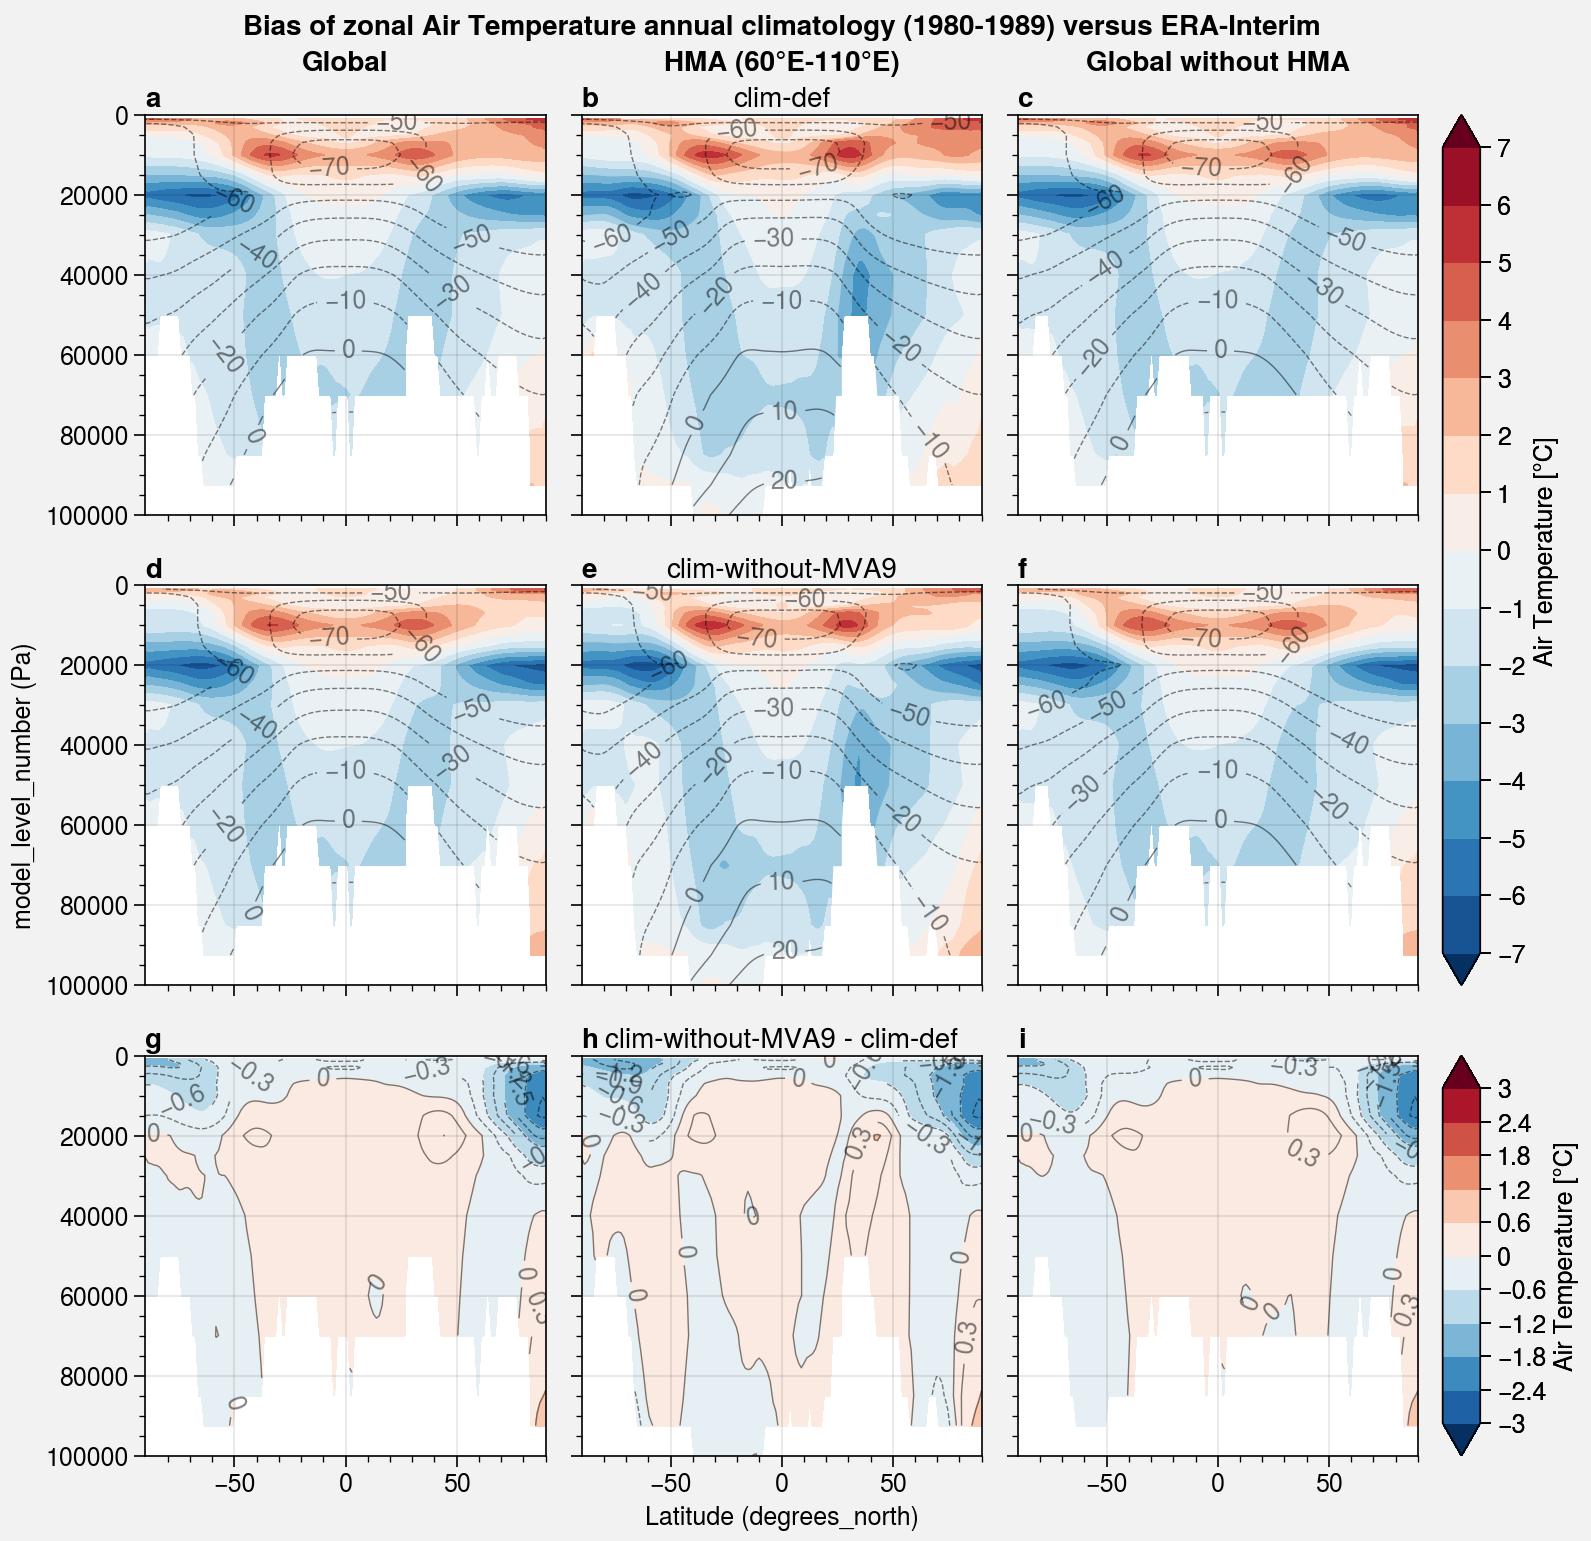

In [17]:
levels = plot.arange(-7,7,1)
extend = 'both'
cmap = 'BuRd'

levels_bias = plot.arange(-3,3,0.6)
extend_bias = 'both'
cmap_bias = 'BuRd'


ncols = 3
lw = 0.5
alpha = 0.5
ylim = (100000,0)

f, axs = plot.subplots(ncols=ncols, nrows=3, axwidth=2)

list_models = [title_1, title_2, title_2+' - '+title_1]

k=0
for i in range(0,2):
    # bias_global
    axs[k].contourf(bias_global[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

    # bias_HMA
    axs[k].contourf(bias_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title=list_models[i])
    k += 1

    # bias_global_without_HMA
    m1 = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

i=2
# For the differences
# bias_global
axs[k].contourf(bias_global[i], cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
axs[k].format(ylim=ylim, title='')
k += 1

# bias_HMA
axs[k].contourf(bias_HMA[i], cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
axs[k].format(ylim=ylim, title=list_models[i])
k += 1

# bias_global_without_HMA
m2 = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
axs[k].format(ylim=ylim, title='')
k += 1
    
    
# f.colorbar(m, label=label, loc='r') 
f.colorbar(m1, label=label + ' ['+units+']', rows=(1, 2))
f.colorbar(m2, label=label + ' ['+units+']', row=3, formatter='simple')


axs.format(
    suptitle='Bias of zonal '+label+' annual climatology ('+period.start+'-'+period.stop+') versus '+obs_name,
    collabels=['Global', 'HMA (60°E-110°E)', 'Global without HMA'], abc = True
)

# f.save('img/'+var+'_zonal_'+exp+'_'+period.start+'-'+period.stop+'.jpg')
# f.save('img/'+var+'_zonal_'+exp+'_'+period.start+'-'+period.stop+'.png')
# f.save('img/'+var+'_zonal_'+exp+'_'+period.start+'-'+period.stop+'.pdf')